# Approach taken
   1.  First of all, we are finding top 25 highest spending ddo's in the last 5 years. 
   2. Then taking these ddo's one by one and finding further top 10 highest spending ddo descriptions under that particular ddo coe.
   3. In this step, we are creating a list containing top 10 highest spending ddo desc and extracting those ddo desc's transactions in whole dataset.
   4. Now checking lineplot of each and every ddo desc and keeping the anomalous transactions only.
   5. Extracting the transactional records of anomalies.

# If sudden spike is seen anywhere in the pattern of any ddo description then that is considered anomalous. I am mentioning it here itself

# Important imports

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Reading the dataset**

In [ ]:
spen=pd.read_csv("/content/drive/My Drive/Education_dataset.csv")
spen['TRANSDATE'] = pd.to_datetime(spen['TRANSDATE'], format='%Y-%m-%d') 
spen['YEAR'] = pd.to_datetime(spen['YEAR'], format='%Y') 
spen.set_index("TRANSDATE",inplace=True)

# General educaton dataset

In [ ]:
spen=spen.loc[spen["major"].isin(["2202"])]
spen

YEAR  District Treasury_Code  ...   BTDED  NETPAYMENT Unique_Code
TRANSDATE                                      ...                                
2015-04-18 2015-01-01  BILASPUR         BLP00  ...    1018      103577   BLP00_200
2015-05-01 2015-01-01  BILASPUR         BLP00  ...  442169     2027393   BLP00_200
2015-05-01 2015-01-01  BILASPUR         BLP00  ...       0       24192   BLP00_200
2015-05-01 2015-01-01  BILASPUR         BLP00  ...   25390      398400   BLP00_200
2015-05-08 2015-01-01  BILASPUR         BLP00  ...  164451           0   BLP00_200
...               ...       ...           ...  ...     ...         ...         ...
2020-03-31 2019-01-01       UNA         UNA03  ...       0        2450   UNA03_230
2020-03-31 2019-01-01       UNA         UNA03  ...       0        1465   UNA03_230
2020-03-31 2019-01-01       UNA         UNA03  ...       0        2195   UNA03_230
2020-03-31 2019-01-01       UNA         UNA03  ...       0         830   UNA03_230
2020-03-31 2019-01-01       UNA         UNA03  ...       0        1425   UNA03_230

[1373899 rows x 28 columns]

# **Checking Top 10 Highest spending DDO's**


In [ ]:
spen1=spen.groupby([spen['DDO_Code'],spen["Unique_Code"],spen['District'],spen["Treasury"],spen["DDO_Desc"]]).agg({'NETPAYMENT':'sum'})
print(spen1.head())

top_10=spen1.sort_values(('NETPAYMENT'), ascending=False)[:20]
top_10.head(25)

                                                                                NETPAYMENT
DDO_Code Unique_Code District         Treasury DDO_Desc                                   
1        CHM01_1     CHAMBA           BHARMOUR S.D.O.(CIVIL) BHARMOUR              9793783
         KNR04_1     KINNAUR          NICHAR   S.D.O.(CIVIL) NICHAR AT B NAGAR    79390000
2        LHL00_2     LAHAUL AND SPITI KEYLONG  PROJECT OFFICER ITDP KEYLONG         636576
5        HMR03_5     HAMIRPUR         SUJANPUR TH.JAGDEVCHAND MEM GDC SUJANPUR    84048219
10       CHM00_10    CHAMBA           CHAMBA   CURATOR B.S. MUSEUM CHAMBA             1736


NETPAYMENT
DDO_Code Unique_Code District   Treasury        DDO_Desc                       
202      KLU00_202   KULLU      KULLU           BEEO KULLU-I          786579167
201      SOL02_201   SOLAN      KASAULI         BEEO DHARAMPUR        736520047
         SOL05_201   SOLAN      NALAGARH        BEEO NALAGARH         723782174
         SOL04_201   SOLAN      RAMSHEHAR       BEEO RAMSHEHAR        697358559
         BLP00_201   BILASPUR   BILASPUR        BEEO SADAR BILASPUR   695042771
206      KLU01_206   KULLU      SERAJ AT BANJAR BEEO BANJAR           693672607
203      KLU00_203   KULLU      KULLU           BEEO KULLU-II         646486322
204      UNA00_204   UNA        UNA             BEEO UNA II           597930483
209      SMR02_209   SIRMAUR    PAONTA          BEEO PAONTA           572145955
201      SOL06_201   SOLAN      KRISHANGARH     BEEO KUTHAR           571271600
         SOL03_201   SOLAN      KANDAGHAT       BEEO KANDAGHAT        558655231
221      BLP02_221   BILASPUR   GHUMARWIN       BEEO I GHUMARWIN      554974645
213      MDI01_213   MANDI      SUNDER NAGAR    BEEO SUNDERNAGAR      550849824
222      KNG04_222   DHARAMSALA NURPUR          BEEO NURPUR           546222888
220      SML00_220   SHIMLA     SHIMLA          BEEO SHIMLA-4         544452276
206      BLP03_206   BILASPUR   JHANDUTTA       BEEO JHANDUTTA        542607494
205      KLU02_205   KULLU      ANI             BEEO ANNI             529867189
214      HMR01_214   HAMIRPUR   BARSAR          BEEO BIJHARI          523514181
201      HMR04_201   HAMIRPUR   BHORANJ         BEEO BHORANJ          518046116
211      SMR01_211   SIRMAUR    RAJGARH         BEEO RAJGARH          502041813

# 203

In [ ]:
ddo_code=spen.loc[spen["DDO_Code"].isin(["203"])]
print(ddo_code.shape)
ddo_code

(58302, 28)


YEAR  District Treasury_Code  ... BTDED  NETPAYMENT Unique_Code
TRANSDATE                                      ...                              
2015-04-28 2015-01-01  BILASPUR         BLP00  ...     0        7027   BLP00_203
2015-04-28 2015-01-01  BILASPUR         BLP00  ...     0       26778   BLP00_203
2015-05-01 2015-01-01  BILASPUR         BLP00  ...  8447      160879   BLP00_203
2015-05-01 2015-01-01  BILASPUR         BLP00  ...   509        4583   BLP00_203
2015-05-01 2015-01-01  BILASPUR         BLP00  ...  3120       39489   BLP00_203
...               ...       ...           ...  ...   ...         ...         ...
2020-03-31 2019-01-01       UNA         UNA03  ...     0           0   UNA03_203
2020-03-31 2019-01-01       UNA         UNA03  ...     0           0   UNA03_203
2020-03-31 2019-01-01       UNA         UNA03  ...  3128       32160   UNA03_203
2020-03-31 2019-01-01       UNA         UNA03  ...   982        8826   UNA03_203
2020-03-31 2019-01-01       UNA         UNA03  ...     0        4285   UNA03_203

[58302 rows x 28 columns]

In [ ]:
final_ddo_desc=ddo_code.groupby([ddo_code["DDO_Desc"]]).agg({'NETPAYMENT':'sum'})
final_ddo_desc

NETPAYMENT
DDO_Desc                                   
BEEO CHAIL CHOWK                  220849276
BEEO GAROLA                       188780745
BEEO KULLU-II                     646486322
BEEO SADAR-II KATAULA             375332980
COMMANDING OFFICER HAMIRPUR        13044267
...                                     ...
PRINCIPAL GSSS (GIRLS) PALAMPUR    73856927
PRINCIPAL GSSS BARSAR              49103845
PRINCIPAL GSSS KUFTU               28683686
PRINCIPAL GSSS NAVGAON             19068295
PRINCIPAL GSSS REWALSAR            53176384

[97 rows x 1 columns]

In [ ]:
final_ddo_desc=final_ddo_desc["NETPAYMENT"].sort_values(ascending=False)[:10]
final_ddo_desc

DDO_Desc
BEEO KULLU-II            646486322
BEEO SADAR-II KATAULA    375332980
BEEO CHAIL CHOWK         220849276
BEEO GAROLA              188780745
PR SSS KANGOO            107130828
GSSS JHANDUTTA           105274440
PR GOVT COLLEGE DEHRI    104576928
GSSS BOYS RAMPUR         101953397
GSSS BHARARI              99529479
PR GSSS NAINA TIKKER      94717145
Name: NETPAYMENT, dtype: int64

In [ ]:
final_ddo_desc.index

Index(['BEEO KULLU-II', 'BEEO SADAR-II KATAULA', 'BEEO CHAIL CHOWK',
       'BEEO GAROLA', 'PR SSS KANGOO', 'GSSS JHANDUTTA',
       'PR GOVT COLLEGE DEHRI', 'GSSS BOYS RAMPUR', 'GSSS BHARARI',
       'PR GSSS NAINA TIKKER'],
      dtype='object', name='DDO_Desc')

# Making list of above 10 ddo description and extract their data from whole dataset and perform analysis

In [ ]:
list01=['BEEO KULLU-II', 'BEEO SADAR-II KATAULA', 'BEEO CHAIL CHOWK',
       'BEEO GAROLA', 'PR SSS KANGOO', 'PR GOVT COLLEGE DEHRI',
       'GSSS JHANDUTTA', 'GSSS BOYS RAMPUR', 'GSSS BHARARI',
       'PR GSSS NAINA TIKKER']

final_ddo_desc=ddo_code.loc[ddo_code["DDO_Desc"].isin(list01)]
final_ddo_desc

YEAR  District Treasury_Code  ...  BTDED  NETPAYMENT Unique_Code
TRANSDATE                                      ...                               
2015-05-23 2015-01-01  BILASPUR         BLP02  ...  25780      341027   BLP02_203
2015-05-23 2015-01-01  BILASPUR         BLP02  ...  16005      154066   BLP02_203
2015-05-23 2015-01-01  BILASPUR         BLP02  ...     30       37065   BLP02_203
2015-05-23 2015-01-01  BILASPUR         BLP02  ...     60       75742   BLP02_203
2015-05-23 2015-01-01  BILASPUR         BLP02  ...  29520      343918   BLP02_203
...               ...       ...           ...  ...    ...         ...         ...
2020-03-31 2019-01-01   SIRMAUR         SMR07  ...   6076       54574   SMR07_203
2020-03-31 2019-01-01   SIRMAUR         SMR07  ...      0         550   SMR07_203
2020-03-31 2019-01-01   SIRMAUR         SMR07  ...      0         550   SMR07_203
2020-03-31 2019-01-01   SIRMAUR         SMR07  ...      0       48310   SMR07_203
2020-03-31 2019-01-01   SIRMAUR         SMR07  ...      0       70760   SMR07_203

[8333 rows x 28 columns]

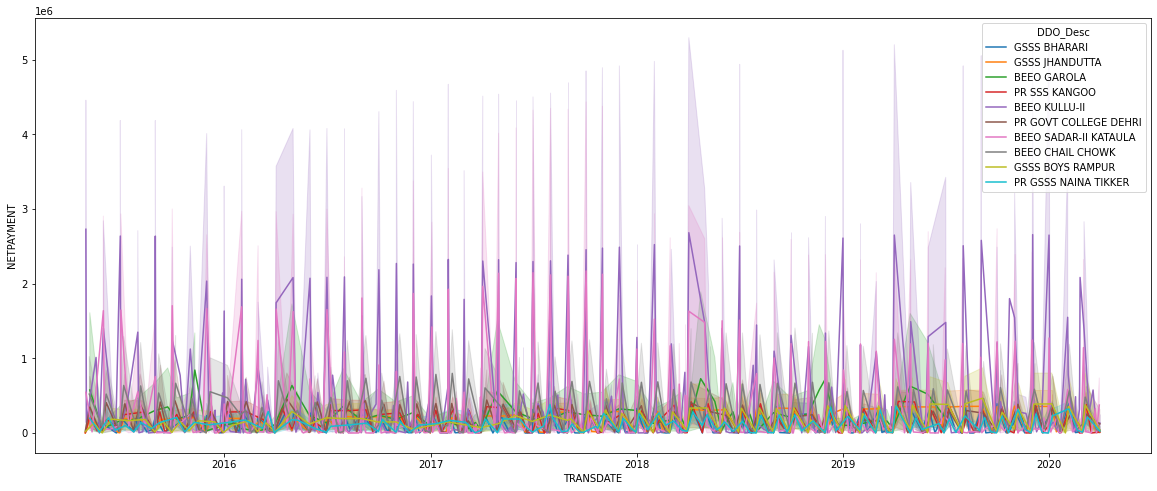

In [ ]:
plt.rcParams['figure.figsize'] = (20,8)
sns.lineplot(data=final_ddo_desc,x=final_ddo_desc.index,y="NETPAYMENT",hue="DDO_Desc")

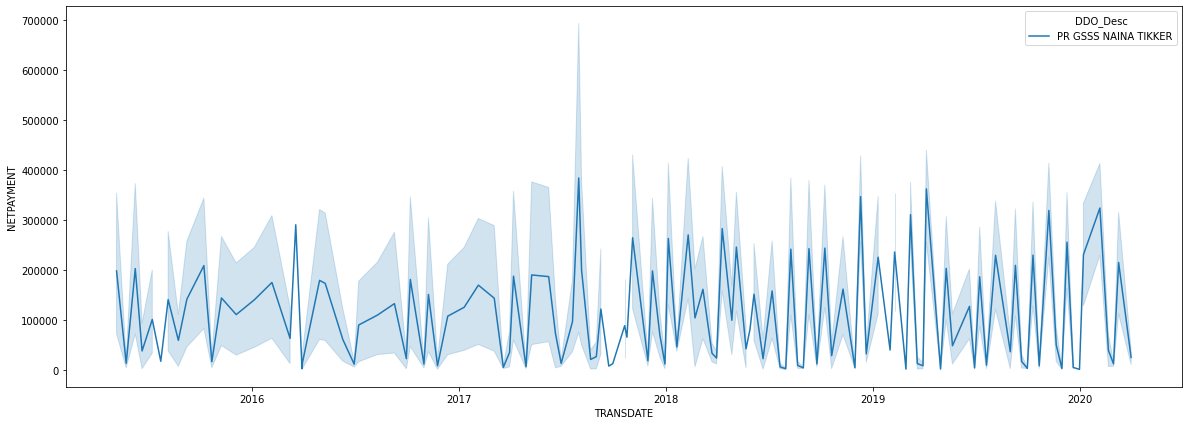

In [ ]:
tres_10=final_ddo_desc[final_ddo_desc["DDO_Desc"].isin(["PR GSSS NAINA TIKKER"])]
plt.rcParams["figure.figsize"]=(20,7)
sns.lineplot(data=tres_10,x=tres_10.index,y="NETPAYMENT",hue="DDO_Desc")

# 206

In [ ]:
ddo_code=spen.loc[spen["DDO_Code"].isin(["206"])]
print(ddo_code.shape)
ddo_code

(56788, 28)


YEAR  District Treasury_Code  ...  BTDED  NETPAYMENT Unique_Code
TRANSDATE                                      ...                               
2015-04-29 2015-01-01  BILASPUR         BLP00  ...   1936           0   BLP00_206
2015-04-29 2015-01-01  BILASPUR         BLP00  ...   2092           0   BLP00_206
2015-05-01 2015-01-01  BILASPUR         BLP00  ...   3860       38109   BLP00_206
2015-05-01 2015-01-01  BILASPUR         BLP00  ...  11188      287585   BLP00_206
2015-05-01 2015-01-01  BILASPUR         BLP00  ...   9316        9145   BLP00_206
...               ...       ...           ...  ...    ...         ...         ...
2020-03-31 2019-01-01       UNA         UNA03  ...  11099       59290   UNA03_206
2020-03-31 2019-01-01       UNA         UNA03  ...   9779           0   UNA03_206
2020-03-31 2019-01-01       UNA         UNA03  ...   4480           0   UNA03_206
2020-03-31 2019-01-01       UNA         UNA03  ...      0        2100   UNA03_206
2020-03-31 2019-01-01       UNA         UNA03  ...      0        3000   UNA03_206

[56788 rows x 28 columns]

In [ ]:
final_ddo_desc=ddo_code.groupby([ddo_code["DDO_Desc"]]).agg({'NETPAYMENT':'sum'})
final_ddo_desc

NETPAYMENT
DDO_Desc                          
BEEO BANJAR              693672607
BEEO FATEHPUR            387065202
BEEO JANJEHLI            373730091
BEEO JHANDUTTA           542607494
BEEO MEHLA-I             201054471
...                            ...
PRINCIPAL GSSS MANGOO     22322253
PRINCIPAL GSSS RAIT       46731040
PRINCIPAL GSSS SAROTRI    27815463
PRINCIPAL GSSS SIANJI     12932055
PRINCIPAL GSSS SURAL      20430463

[94 rows x 1 columns]

In [ ]:

final_ddo_desc=final_ddo_desc["NETPAYMENT"].sort_values(ascending=False)[:10]
final_ddo_desc

DDO_Desc
BEEO BANJAR            693672607
BEEO JHANDUTTA         542607494
BEEO NIRMAND           488072854
BEEO FATEHPUR          387065202
BEEO JANJEHLI          373730091
BEEO NICHAR            346338848
BEEO PACHHAD           324499241
BEEO NAGROTA SURIAN    228198811
BEEO MEHLA-I           201054471
PR SSS BHUNTER         124614741
Name: NETPAYMENT, dtype: int64

In [ ]:
final_ddo_desc.index

Index(['BEEO BANJAR', 'BEEO JHANDUTTA', 'BEEO NIRMAND', 'BEEO FATEHPUR',
       'BEEO JANJEHLI', 'BEEO NICHAR', 'BEEO PACHHAD', 'BEEO NAGROTA SURIAN',
       'BEEO MEHLA-I', 'PR SSS BHUNTER'],
      dtype='object', name='DDO_Desc')

In [ ]:
list01=['BEEO BANJAR', 'BEEO JHANDUTTA', 'BEEO NIRMAND', 'BEEO FATEHPUR',
       'BEEO JANJEHLI', 'BEEO NICHAR', 'BEEO PACHHAD', 'BEEO NAGROTA SURIAN',
       'BEEO MEHLA-I', 'PR SSS BHUNTER']
final_ddo_desc=ddo_code.loc[ddo_code["DDO_Desc"].isin(list01)]
final_ddo_desc


YEAR  District Treasury_Code  ...   BTDED  NETPAYMENT Unique_Code
TRANSDATE                                      ...                                
2015-05-08 2015-01-01  BILASPUR         BLP03  ...       0      222500   BLP03_206
2015-05-08 2015-01-01  BILASPUR         BLP03  ...      30       21749   BLP03_206
2015-05-08 2015-01-01  BILASPUR         BLP03  ...       0        6291   BLP03_206
2015-05-08 2015-01-01  BILASPUR         BLP03  ...   69344     3944143   BLP03_206
2015-05-08 2015-01-01  BILASPUR         BLP03  ...  368822     3277019   BLP03_206
...               ...       ...           ...  ...     ...         ...         ...
2020-03-31 2019-01-01   SIRMAUR         SMR07  ...       0       44000   SMR07_206
2020-03-31 2019-01-01   SIRMAUR         SMR07  ...       0       94000   SMR07_206
2020-03-31 2019-01-01   SIRMAUR         SMR07  ...       0       42100   SMR07_206
2020-03-31 2019-01-01   SIRMAUR         SMR07  ...       0       21200   SMR07_206
2020-03-31 2019-01-01   SIRMAUR         SMR07  ...       0       84000   SMR07_206

[11330 rows x 28 columns]

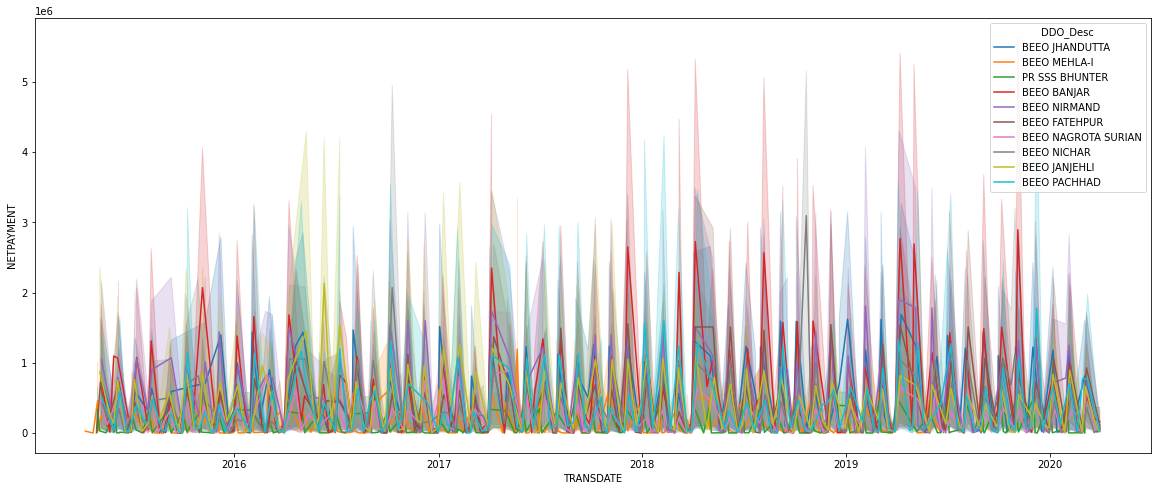

In [ ]:
plt.rcParams['figure.figsize'] = (20,8)
sns.lineplot(data=final_ddo_desc,x=final_ddo_desc.index,y="NETPAYMENT",hue="DDO_Desc")

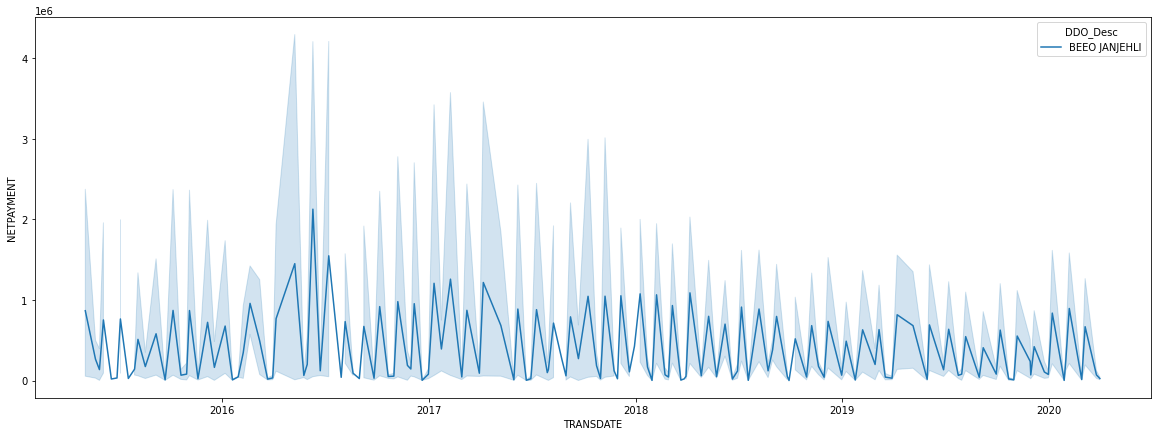

In [ ]:
tres_5=final_ddo_desc[final_ddo_desc["DDO_Desc"].isin(["BEEO JANJEHLI"])]
plt.rcParams["figure.figsize"]=(20,7)
sns.lineplot(data=tres_5,x=tres_5.index,y="NETPAYMENT",hue="DDO_Desc")

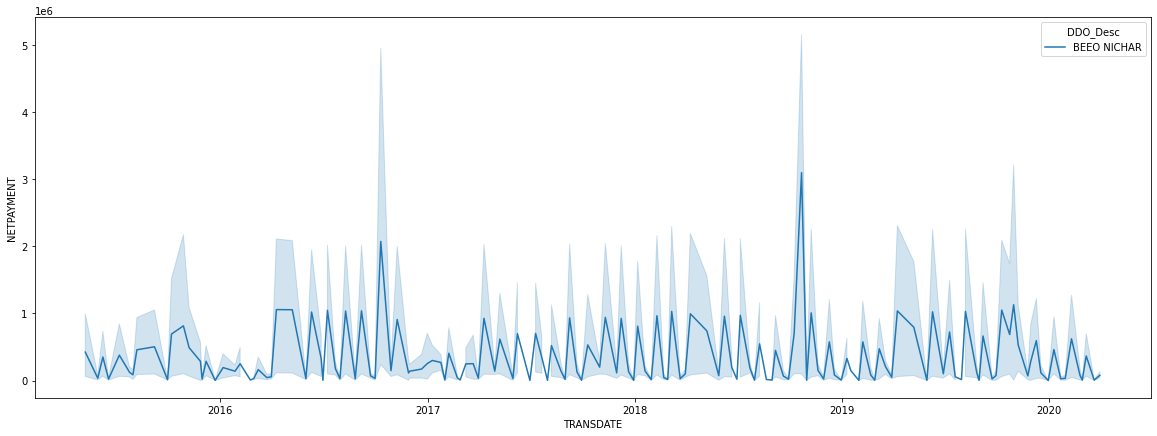

In [ ]:
tres_6=final_ddo_desc[final_ddo_desc["DDO_Desc"].isin(["BEEO NICHAR"])]
plt.rcParams["figure.figsize"]=(20,7)
sns.lineplot(data=tres_6,x=tres_6.index,y="NETPAYMENT",hue="DDO_Desc")

# This is anomalous

In [ ]:
tres_6["NETPAYMENT"].sort_values(ascending=False)[:5]

TRANSDATE
2016-10-10    10155000
2015-10-28    10120000
2018-10-22     5151000
2019-10-24     4830000
2019-10-31     4272000
Name: NETPAYMENT, dtype: int64

In [ ]:
tres_6.drop(["YEAR"],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
tres_6.loc[tres_6.index.isin(["2018-10-22"])].values

array([['KINNAUR', 'KNR04', 'NICHAR', 206, 'BEEO NICHAR', 31,
        'TRIBAL DEVELOPMENT', 2202, 'GENERAL EDUCATION', 1,
        'ELEMENTARY EDUCATION', 796, 'TRIBAL AREA SUB PLAN', 2,
        'EXPENDITURE ON BLOCK PRIMARY EDUCATION OFFICERS AND STAFF [S00NM]',
        'S00NM', 'V', 'N', 1, 'SALARIES', '[TRVch#459]', 1, 100000, 0, 0,
        100000, 'KNR04_206'],
       ['KINNAUR', 'KNR04', 'NICHAR', 206, 'BEEO NICHAR', 31,
        'TRIBAL DEVELOPMENT', 2202, 'GENERAL EDUCATION', 1,
        'ELEMENTARY EDUCATION', 796, 'TRIBAL AREA SUB PLAN', 3,
        'EXPENDITURE ON PRIMARY SCHOOLS [S00NM]', 'S00NM', 'V', 'N', 1,
        'SALARIES', '[TRVch#457]', 1, 5151000, 0, 0, 5151000,
        'KNR04_206'],
       ['KINNAUR', 'KNR04', 'NICHAR', 206, 'BEEO NICHAR', 31,
        'TRIBAL DEVELOPMENT', 2202, 'GENERAL EDUCATION', 1,
        'ELEMENTARY EDUCATION', 796, 'TRIBAL AREA SUB PLAN', 3,
        'EXPENDITURE ON PRIMARY SCHOOLS [S00NM]', 'S00NM', 'V', 'N', 1,
        'SALARIES', '[TRVch#458]'

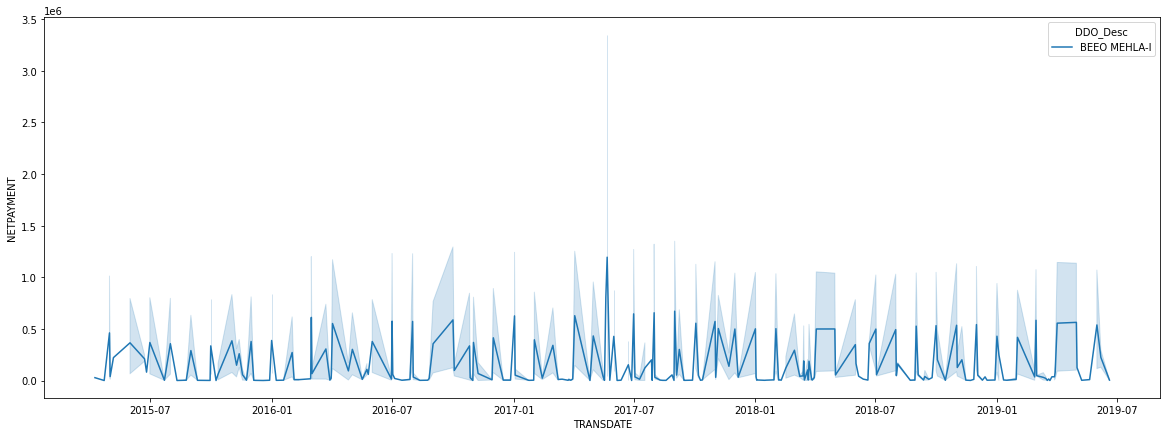

In [ ]:
tres_10=final_ddo_desc[final_ddo_desc["DDO_Desc"].isin(["BEEO MEHLA-I"])]
plt.rcParams["figure.figsize"]=(20,7)
sns.lineplot(data=tres_10,x=tres_10.index,y="NETPAYMENT",hue="DDO_Desc")

# 220

In [ ]:
ddo_code=spen.loc[spen["DDO_Code"].isin(["220"])]
print(ddo_code.shape)
ddo_code

(25637, 28)


YEAR  District Treasury_Code  ... BTDED  NETPAYMENT Unique_Code
TRANSDATE                                      ...                              
2015-05-01 2015-01-01  BILASPUR         BLP00  ...  6285       93276   BLP00_220
2015-05-01 2015-01-01  BILASPUR         BLP00  ...  5164       38771   BLP00_220
2015-05-01 2015-01-01  BILASPUR         BLP00  ...  4340       49451   BLP00_220
2015-05-05 2015-01-01  BILASPUR         BLP00  ...  2610       10443   BLP00_220
2015-05-05 2015-01-01  BILASPUR         BLP00  ...     0        2850   BLP00_220
...               ...       ...           ...  ...   ...         ...         ...
2020-03-31 2019-01-01       UNA         UNA03  ...     0        1087   UNA03_220
2020-03-31 2019-01-01       UNA         UNA03  ...     0        2950   UNA03_220
2020-03-31 2019-01-01       UNA         UNA03  ...     0        2810   UNA03_220
2020-03-31 2019-01-01       UNA         UNA03  ...     0         800   UNA03_220
2020-03-31 2019-01-01       UNA         UNA03  ...     0       26956   UNA03_220

[25637 rows x 28 columns]

In [ ]:
final_ddo_desc=ddo_code.groupby([ddo_code["DDO_Desc"]]).agg({'NETPAYMENT':'sum'})
final_ddo_desc

NETPAYMENT
DDO_Desc                                         
BEEO CHAMBA-I                           432036449
BEEO SHIMLA-4                           544452276
GHS BAHOT KASHOL                         12371638
GHS BARWALA                              40061187
GHS DANOGHAT                             45501727
GHS DHIRWIN                              32939242
GHS PANSAI                               25516465
GSSS  BHARARI                            85171300
GSSS BATHU                               31451842
GSSS BIJMAL                              13275953
GSSS BIRLA                               36061135
GSSS GIRLS THEOG                        111700929
GSSS HATGARH                             37865441
GSSS HAWAN                               44437640
GSSS JAGORI 18/20 RAMPUR                 12261067
GSSS JAREE                               63970440
GSSS KOTHI RANITAL                       71535730
GSSS NEHRIAN                             51072820
GSSS PANDOA                              15088252
GSSS PANJHERA                            84706869
GSSS RAINSARI                            38810790
GSSS SADWAN                              68358225
GSSS SHAKRA                              45923083
GSSS TALAI                               27262672
GSSS TAMBAR                              39050874
GSSS TANGNU                              11553611
HM GHS BALSA                             35796619
OC IST HP GIRLS BN NCC SOLAN             16767269
PR GOVT COLLEGE DHALIARA                 99191566
PR GOVT COLLEGE RAJGARH                  60899391
PR GSSS CHANDANI                         24259123
PR GSSS JAUNI                            31834112
PR SSS NIMELRI                           38962655
PR SSS SALWANA                           32130965
PRINCIPAL GOVT DEGREE COLLEGE SHAHPUR    39868944
PRINCIPAL GSSS APRON                     26014717
PRINCIPAL GSSS BHALLAD                   20369425
PRINCIPAL GSSS CHHAMYAR                  11305641
PRINCIPAL GSSS CHOBIN                    24238738
PRINCIPAL GSSS DEVIKOTHI                 11109530
PRINCIPAL GSSS DHARMEHAR                 13305430
PRINCIPAL GSSS KASHOLI                   22920602
PRINCIPAL GSSS KATHIANA                  37895371
PRINCIPAL GSSS KHARKAHAN                  7623973
PRINCIPAL GSSS KUTWA                     10740590
PRINCIPAL GSSS LAKHNOO                   25662491
PRINCIPAL GSSS PAHRA                     65778983
PRINCIPAL GSSS SARI                      24953500
PRINCIPAL GSSS TAROUR                    22199146

In [ ]:
final_ddo_desc=final_ddo_desc["NETPAYMENT"].sort_values(ascending=False)[:10]
final_ddo_desc

DDO_Desc
BEEO SHIMLA-4               544452276
BEEO CHAMBA-I               432036449
GSSS GIRLS THEOG            111700929
PR GOVT COLLEGE DHALIARA     99191566
GSSS  BHARARI                85171300
GSSS PANJHERA                84706869
GSSS KOTHI RANITAL           71535730
GSSS SADWAN                  68358225
PRINCIPAL GSSS PAHRA         65778983
GSSS JAREE                   63970440
Name: NETPAYMENT, dtype: int64

In [ ]:
final_ddo_desc.index

Index(['BEEO SHIMLA-4', 'BEEO CHAMBA-I', 'GSSS GIRLS THEOG',
       'PR GOVT COLLEGE DHALIARA', 'GSSS  BHARARI', 'GSSS PANJHERA',
       'GSSS KOTHI RANITAL', 'GSSS SADWAN', 'PRINCIPAL GSSS PAHRA',
       'GSSS JAREE'],
      dtype='object', name='DDO_Desc')

In [ ]:
list01=['BEEO SHIMLA-4', 'BEEO CHAMBA-I', 'GSSS GIRLS THEOG',
       'PR GOVT COLLEGE DHALIARA', 'GSSS  BHARARI', 'GSSS PANJHERA',
       'GSSS KOTHI RANITAL', 'GSSS SADWAN', 'PRINCIPAL GSSS PAHRA',
       'GSSS JAREE']
final_ddo_desc=ddo_code.loc[ddo_code["DDO_Desc"].isin(list01)]
final_ddo_desc

YEAR District Treasury_Code  ...   BTDED  NETPAYMENT Unique_Code
TRANSDATE                                     ...                                
2015-05-01 2015-01-01   CHAMBA         CHM00  ...  195719     3880569   CHM00_220
2015-05-01 2015-01-01   CHAMBA         CHM00  ...       0      183060   CHM00_220
2015-05-01 2015-01-01   CHAMBA         CHM00  ...  390099     2184934   CHM00_220
2015-05-01 2015-01-01   CHAMBA         CHM00  ...   15745      138107   CHM00_220
2015-05-13 2015-01-01   CHAMBA         CHM00  ...      30       30930   CHM00_220
...               ...      ...           ...  ...     ...         ...         ...
2020-03-31 2019-01-01    SOLAN         SOL05  ...       0        2901   SOL05_220
2020-03-31 2019-01-01    SOLAN         SOL05  ...       0        5585   SOL05_220
2020-03-31 2019-01-01    SOLAN         SOL05  ...       0        2025   SOL05_220
2020-03-31 2019-01-01    SOLAN         SOL05  ...       0        3616   SOL05_220
2020-03-31 2019-01-01    SOLAN         SOL05  ...       0       19535   SOL05_220

[7701 rows x 28 columns]

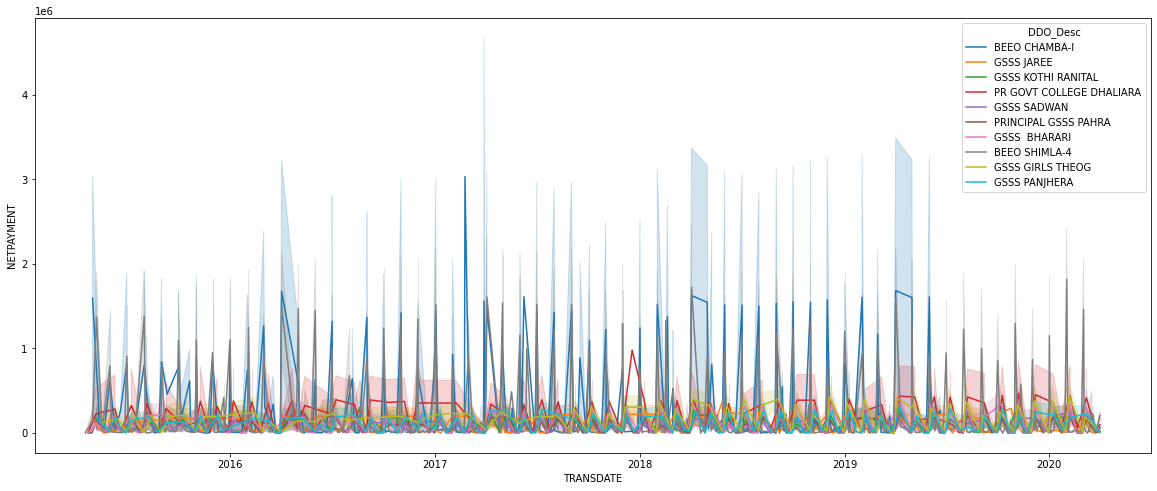

In [ ]:
plt.rcParams['figure.figsize'] = (20,8)
sns.lineplot(data=final_ddo_desc,x=final_ddo_desc.index,y="NETPAYMENT",hue="DDO_Desc")

In [ ]:
list01

['BEEO SHIMLA-4',
 'BEEO CHAMBA-I',
 'GSSS GIRLS THEOG',
 'PR GOVT COLLEGE DHALIARA',
 'GSSS  BHARARI',
 'GSSS PANJHERA',
 'GSSS KOTHI RANITAL',
 'GSSS SADWAN',
 'PRINCIPAL GSSS PAHRA',
 'GSSS JAREE']

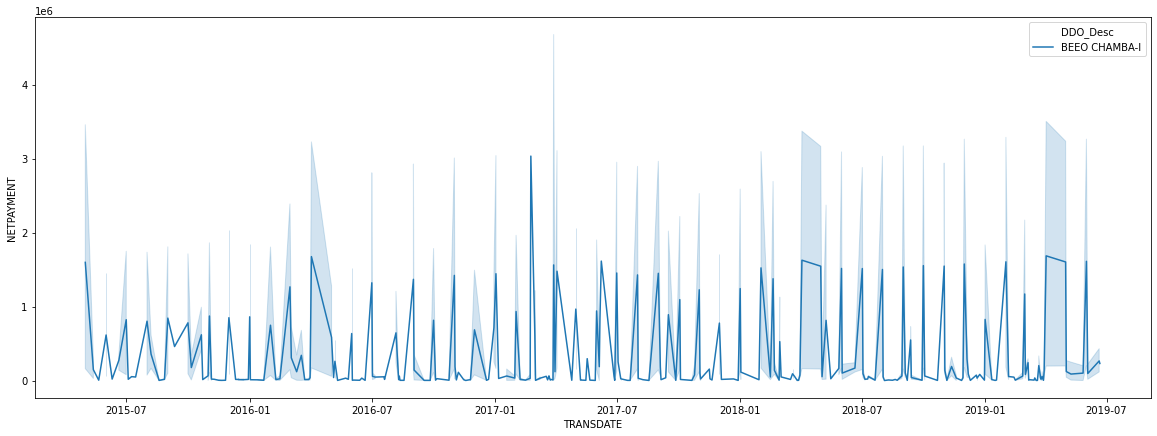

In [ ]:
tres_2=final_ddo_desc[final_ddo_desc["DDO_Desc"].isin(["BEEO CHAMBA-I"])]
plt.rcParams["figure.figsize"]=(20,7)
sns.lineplot(data=tres_2,x=tres_2.index,y="NETPAYMENT",hue="DDO_Desc")

In [ ]:
tres_2["NETPAYMENT"].sort_values(ascending=False)[:10]

TRANSDATE
2017-03-29    6232763
2019-04-02    4720788
2018-04-03    4588340
2019-02-01    4411575
2018-12-01    4410354
2019-01-01    4376634
2019-06-01    4355611
2018-11-01    4310793
2019-05-01    4310097
2017-04-03    4284618
Name: NETPAYMENT, dtype: int64

In [ ]:
tres_2.loc[tres_2.index.isin(["2017-03-29"])].values

array([[Timestamp('2016-01-01 00:00:00'), 'CHAMBA', 'CHM00', 'CHAMBA',
        220, 'BEEO CHAMBA-I', 8, 'EDUCATION', 2202, 'GENERAL EDUCATION',
        1, 'ELEMENTARY EDUCATION', 101, 'GOVERNMENT PRIMARY SCHOOLS', 1,
        'EXPENDITURE ON EDUCATION [S00B]', 'S00N', 'V', 'N', 1,
        'SALARIES', '[TRVch#1951]', 1, 6948457, 0, 715694, 6232763,
        'CHM00_220'],
       [Timestamp('2016-01-01 00:00:00'), 'CHAMBA', 'CHM00', 'CHAMBA',
        220, 'BEEO CHAMBA-I', 8, 'EDUCATION', 2202, 'GENERAL EDUCATION',
        1, 'ELEMENTARY EDUCATION', 101, 'GOVERNMENT PRIMARY SCHOOLS', 1,
        'EXPENDITURE ON EDUCATION [S00B]', 'S00N', 'V', 'N', 3,
        'TRAVEL EXPENSES', '[TRVch#1941]', 1, 3168, 0, 0, 3168,
        'CHM00_220'],
       [Timestamp('2016-01-01 00:00:00'), 'CHAMBA', 'CHM00', 'CHAMBA',
        220, 'BEEO CHAMBA-I', 8, 'EDUCATION', 2202, 'GENERAL EDUCATION',
        1, 'ELEMENTARY EDUCATION', 101, 'GOVERNMENT PRIMARY SCHOOLS', 1,
        'EXPENDITURE ON EDUCATION [S00B]', 'S

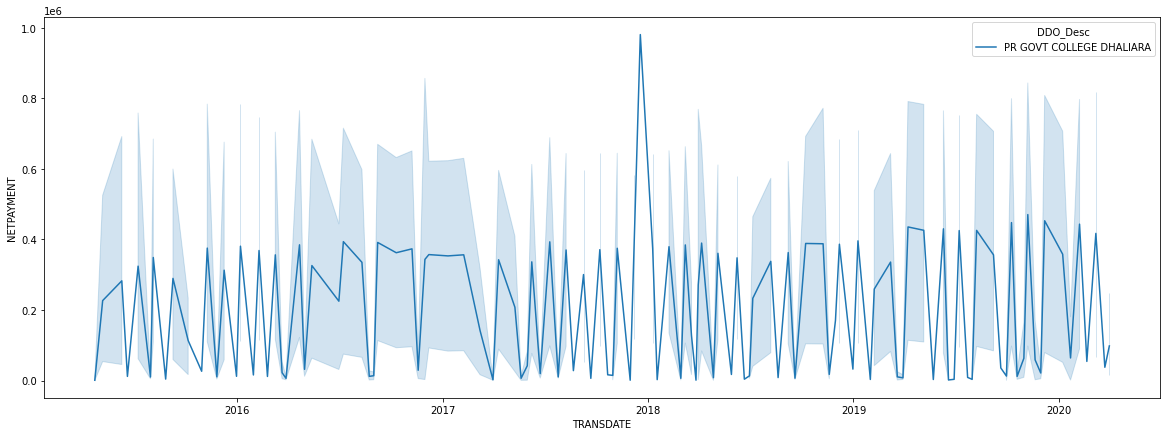

In [ ]:
tres_4=final_ddo_desc[final_ddo_desc["DDO_Desc"].isin(["PR GOVT COLLEGE DHALIARA"])]
plt.rcParams["figure.figsize"]=(20,7)
sns.lineplot(data=tres_4,x=tres_4.index,y="NETPAYMENT",hue="DDO_Desc")

In [ ]:
tres_4["NETPAYMENT"].sort_values(ascending=False)[:10]

TRANSDATE
2015-05-07    1102385
2015-06-10    1080168
2016-05-13    1026642
2018-03-31    1024240
2015-12-09    1007027
2019-04-08     998608
2019-05-06     991195
2016-01-07     988703
2015-11-09     985674
2019-09-07     985407
Name: NETPAYMENT, dtype: int64

In [ ]:
tres_4.loc[tres_4.index.isin(["2018-03-31"])].values

array([[Timestamp('2017-01-01 00:00:00'), 'DHARAMSALA', 'KNG02', 'DEHRA',
        220, 'PR GOVT COLLEGE DHALIARA', 8, 'EDUCATION', 2202,
        'GENERAL EDUCATION', 3, 'UNIVERSITY AND HIGHER EDUCATION', 103,
        'GOVERNMENT COLLEGES & INSTITUTES', 1,
        'GOVERNMENT COLLEGES [S00N]', 'S00N', 'V', 'N', 5,
        'OFFICE EXPENSES', '[TRVch#9524]', 1, 3923, 0, 0, 3923,
        'KNG02_220'],
       [Timestamp('2017-01-01 00:00:00'), 'DHARAMSALA', 'KNG02', 'DEHRA',
        220, 'PR GOVT COLLEGE DHALIARA', 8, 'EDUCATION', 2202,
        'GENERAL EDUCATION', 3, 'UNIVERSITY AND HIGHER EDUCATION', 103,
        'GOVERNMENT COLLEGES & INSTITUTES', 1,
        'GOVERNMENT COLLEGES [S00N]', 'S00N', 'V', 'N', 5,
        'OFFICE EXPENSES', '[TRVch#9525]', 1, 55637, 0, 0, 55637,
        'KNG02_220'],
       [Timestamp('2017-01-01 00:00:00'), 'DHARAMSALA', 'KNG02', 'DEHRA',
        220, 'PR GOVT COLLEGE DHALIARA', 8, 'EDUCATION', 2202,
        'GENERAL EDUCATION', 3, 'UNIVERSITY AND HIGHER EDUC

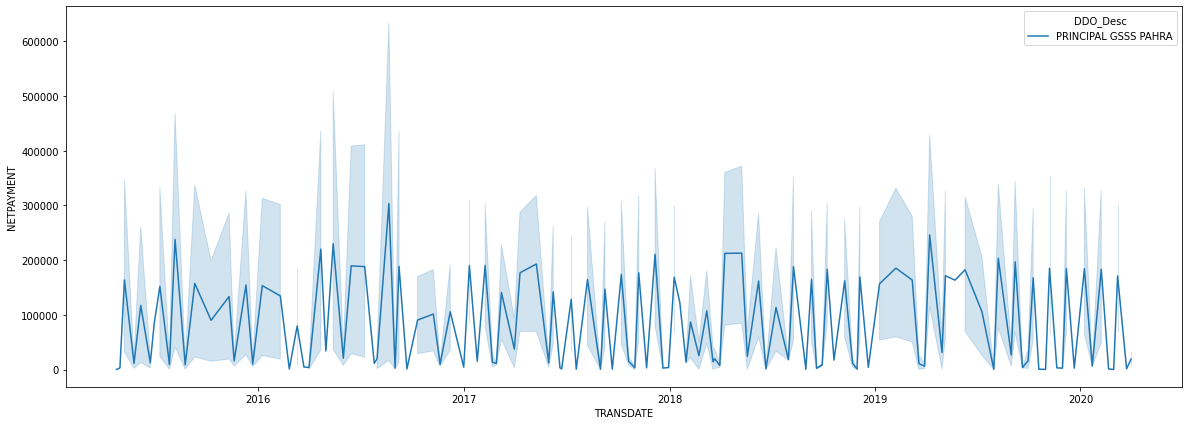

In [ ]:
tres_8=final_ddo_desc[final_ddo_desc["DDO_Desc"].isin(["PRINCIPAL GSSS PAHRA"])]
plt.rcParams["figure.figsize"]=(20,7)
sns.lineplot(data=tres_8,x=tres_8.index,y="NETPAYMENT",hue="DDO_Desc")

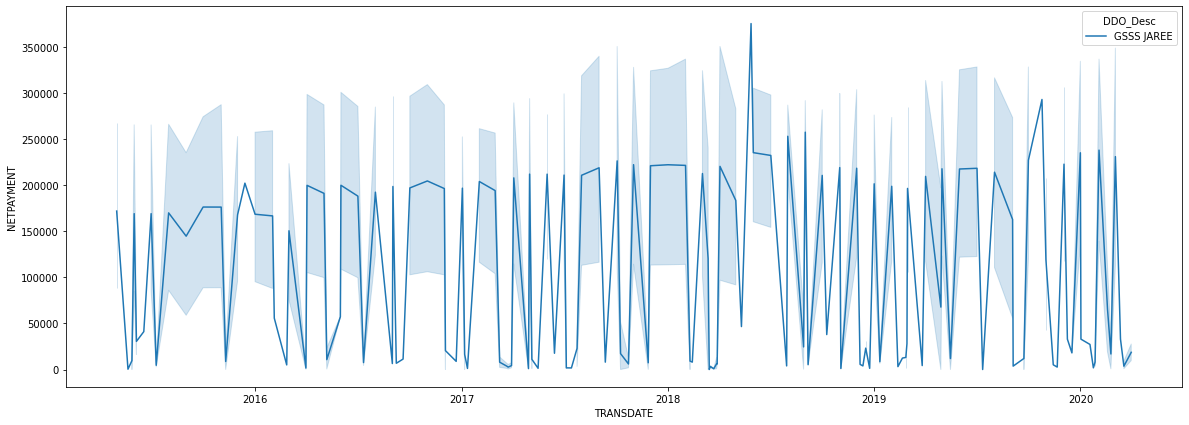

In [ ]:
tres_9=final_ddo_desc[final_ddo_desc["DDO_Desc"].isin(["GSSS JAREE"])]
plt.rcParams["figure.figsize"]=(20,7)
sns.lineplot(data=tres_9,x=tres_9.index,y="NETPAYMENT",hue="DDO_Desc")

In [ ]:
tres_9["NETPAYMENT"].sort_values(ascending=False)[:10]

TRANSDATE
2017-10-03    429569
2017-09-01    422953
2017-08-01    414353
2018-03-03    409712
2018-02-01    408597
2016-04-02    394529
2018-01-01    392676
2018-04-03    391755
2017-11-01    391667
2020-03-03    390139
Name: NETPAYMENT, dtype: int64

In [ ]:
tres_9.loc[tres_9.index.isin(["2018-03-03"])].values

array([[Timestamp('2017-01-01 00:00:00'), 'KULLU', 'KLU00', 'KULLU', 220,
        'GSSS JAREE', 8, 'EDUCATION', 2202, 'GENERAL EDUCATION', 1,
        'ELEMENTARY EDUCATION', 101, 'GOVERNMENT PRIMARY SCHOOLS', 3,
        'MIDDLE SCHOOL [S00B]', 'S00N', 'V', 'N', 1, 'SALARIES',
        '[TRVch#74]', 1, 294228, 137000, 31979, 125249, 'KLU00_220'],
       [Timestamp('2017-01-01 00:00:00'), 'KULLU', 'KLU00', 'KULLU', 220,
        'GSSS JAREE', 8, 'EDUCATION', 2202, 'GENERAL EDUCATION', 1,
        'ELEMENTARY EDUCATION', 101, 'GOVERNMENT PRIMARY SCHOOLS', 3,
        'MIDDLE SCHOOL [S00B]', 'S00N', 'V', 'N', 1, 'SALARIES',
        '[TRVch#75]', 1, 354403, 0, 50028, 304375, 'KLU00_220'],
       [Timestamp('2017-01-01 00:00:00'), 'KULLU', 'KLU00', 'KULLU', 220,
        'GSSS JAREE', 8, 'EDUCATION', 2202, 'GENERAL EDUCATION', 2,
        'SECONDARY EDUCATION', 109, 'GOVERNMENT SECONDARY SCHOOLS', 1,
        'SECONDARY SCHOOLS [S00B]', 'S00N', 'V', 'N', 1, 'SALARIES',
        '[TRVch#76]', 1, 1054

# 222

In [ ]:
ddo_code=spen.loc[spen["DDO_Code"].isin(["222"])]
print(ddo_code.shape)
ddo_code

(20445, 28)


YEAR  District Treasury_Code  ...  BTDED  NETPAYMENT Unique_Code
TRANSDATE                                      ...                               
2015-05-01 2015-01-01  BILASPUR         BLP00  ...   1283       20695   BLP00_222
2015-05-01 2015-01-01  BILASPUR         BLP00  ...  18110      264035   BLP00_222
2015-05-01 2015-01-01  BILASPUR         BLP00  ...   2283       24479   BLP00_222
2015-05-01 2015-01-01  BILASPUR         BLP00  ...   5064       32387   BLP00_222
2015-05-01 2015-01-01  BILASPUR         BLP00  ...  41404      507090   BLP00_222
...               ...       ...           ...  ...    ...         ...         ...
2020-03-20 2019-01-01       UNA         UNA03  ...      0        1382   UNA03_222
2020-03-31 2019-01-01       UNA         UNA03  ...    322        2915   UNA03_222
2020-03-31 2019-01-01       UNA         UNA03  ...      0        5045   UNA03_222
2020-03-31 2019-01-01       UNA         UNA03  ...   1170       10523   UNA03_222
2020-03-31 2019-01-01       UNA         UNA03  ...   4398           0   UNA03_222

[20445 rows x 28 columns]

In [ ]:
final_ddo_desc=ddo_code.groupby([ddo_code["DDO_Desc"]]).agg({'NETPAYMENT':'sum'})
final_ddo_desc

NETPAYMENT
DDO_Desc                                        
BEEO II GHUMARWIN                      460024742
BEEO KALHEL                            255124882
BEEO NURPUR                            546222888
GHS DURAH                               12751814
GHS MARIGHAT                            16946700
GHS PARIHAR                             19545373
GHS SHASHAN                             37431774
GSSS  NALSUHA                           40486784
GSSS  PIRTHIPUR                         40895764
GSSS BAGHAL                              9405597
GSSS BANATHI                            45523733
GSSS BANOLI                             25319461
GSSS GUMMA                              13173376
GSSS HATWAS                             56055857
GSSS HIRRAB                             11848832
GSSS KINNU                              37374713
GSSS LADHAGI                            12304707
GSSS PABIANA                            32846603
GSSS SAKOH                              42744824
HM GHS BHUKKER                          32003238
HM GHS DRAMAN                           24428761
HM GHS GADIARA                          26754395
HM GHS KUNHOO                           26902637
PR GOVT BOYS COLLEGE SHIMLA            216592382
PR GSSS G/PUR BULLA                     28802457
PR GSSS GADSA                           84112438
PR GSSS GURKOTHA                        43176531
PR GSSS NIHAL GARH                      56090384
PR SSS BARMANA                          58000173
PR SSS PHANGWAS                         52058921
PRIN G SSS DANDRU BARSAR                49750734
PRINCIPAL GOVT DEGREE COLLEGE NADAUN   102679720
PRINCIPAL GSSS BHALI                    24144160
PRINCIPAL GSSS CHURDI                   13063145
PRINCIPAL GSSS GHARYACH                 16375812
PRINCIPAL GSSS KHARSI                   30057168
PRINCIPAL GSSS MANDHALA                 47226215
PRINCIPAL GSSS SALOH                    39407175

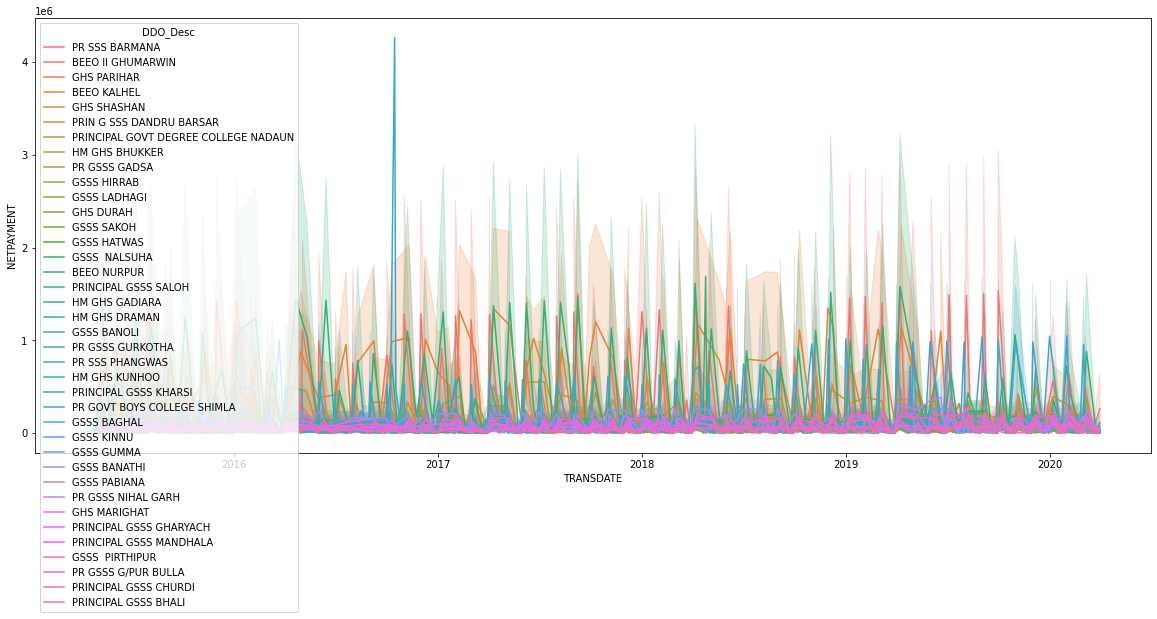

In [ ]:
plt.rcParams['figure.figsize'] = (20,8)
sns.lineplot(data=ddo_code,x=ddo_code.index,y="NETPAYMENT",hue="DDO_Desc")

In [ ]:

final_ddo_desc=final_ddo_desc["NETPAYMENT"].sort_values(ascending=False)[:10]
final_ddo_desc

DDO_Desc
BEEO NURPUR                             546222888
BEEO II GHUMARWIN                       460024742
BEEO KALHEL                             255124882
PR GOVT BOYS COLLEGE SHIMLA             216592382
PRINCIPAL GOVT DEGREE COLLEGE NADAUN    102679720
PR GSSS GADSA                            84112438
PR SSS BARMANA                           58000173
PR GSSS NIHAL GARH                       56090384
GSSS HATWAS                              56055857
PR SSS PHANGWAS                          52058921
Name: NETPAYMENT, dtype: int64

In [ ]:
final_ddo_desc.index

Index(['BEEO NURPUR', 'BEEO II GHUMARWIN', 'BEEO KALHEL',
       'PR GOVT BOYS COLLEGE SHIMLA', 'PRINCIPAL GOVT DEGREE COLLEGE NADAUN',
       'PR GSSS GADSA', 'PR SSS BARMANA', 'PR GSSS NIHAL GARH', 'GSSS HATWAS',
       'PR SSS PHANGWAS'],
      dtype='object', name='DDO_Desc')

In [ ]:
list01=['BEEO NURPUR', 'BEEO II GHUMARWIN', 'BEEO KALHEL',
       'PR GOVT BOYS COLLEGE SHIMLA', 'PRINCIPAL GOVT DEGREE COLLEGE NADAUN',
       'PR GSSS GADSA', 'PR SSS BARMANA', 'PR GSSS NIHAL GARH', 'GSSS HATWAS',
       'PR SSS PHANGWAS']
final_ddo_desc=ddo_code.loc[ddo_code["DDO_Desc"].isin(list01)]
final_ddo_desc


YEAR  District Treasury_Code  ...  BTDED  NETPAYMENT Unique_Code
TRANSDATE                                      ...                               
2015-05-01 2015-01-01  BILASPUR         BLP00  ...   1283       20695   BLP00_222
2015-05-01 2015-01-01  BILASPUR         BLP00  ...  18110      264035   BLP00_222
2015-05-01 2015-01-01  BILASPUR         BLP00  ...   2283       24479   BLP00_222
2015-05-01 2015-01-01  BILASPUR         BLP00  ...   5064       32387   BLP00_222
2015-05-01 2015-01-01  BILASPUR         BLP00  ...  41404      507090   BLP00_222
...               ...       ...           ...  ...    ...         ...         ...
2020-03-31 2019-01-01   SIRMAUR         SMR02  ...      0         902   SMR02_222
2020-03-31 2019-01-01   SIRMAUR         SMR02  ...      0        2760   SMR02_222
2020-03-31 2019-01-01   SIRMAUR         SMR02  ...      0        5304   SMR02_222
2020-03-31 2019-01-01   SIRMAUR         SMR02  ...      0        1560   SMR02_222
2020-03-31 2019-01-01   SIRMAUR         SMR02  ...      0        1550   SMR02_222

[7787 rows x 28 columns]

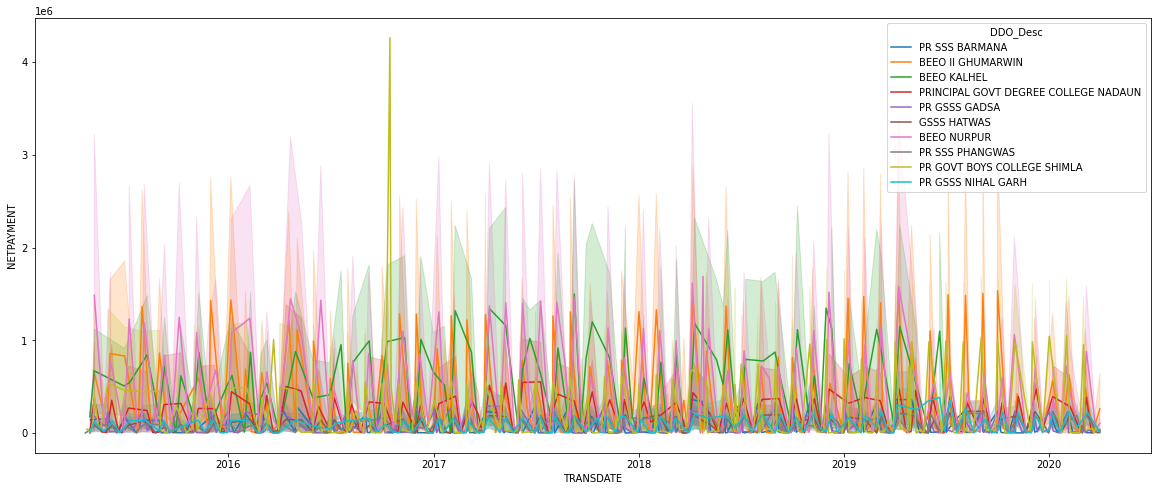

In [ ]:
plt.rcParams['figure.figsize'] = (20,8)
sns.lineplot(data=final_ddo_desc,x=final_ddo_desc.index,y="NETPAYMENT",hue="DDO_Desc")

In [ ]:
list01

['BEEO NURPUR',
 'BEEO II GHUMARWIN',
 'BEEO KALHEL',
 'PR GOVT BOYS COLLEGE SHIMLA',
 'PRINCIPAL GOVT DEGREE COLLEGE NADAUN',
 'PR GSSS GADSA',
 'PR SSS BARMANA',
 'PR GSSS NIHAL GARH',
 'GSSS HATWAS',
 'PR SSS PHANGWAS']

In [ ]:
list01

['BEEO NURPUR',
 'BEEO II GHUMARWIN',
 'BEEO KALHEL',
 'PR GOVT BOYS COLLEGE SHIMLA',
 'PRINCIPAL GOVT DEGREE COLLEGE NADAUN',
 'PR GSSS GADSA',
 'PR SSS BARMANA',
 'PR GSSS NIHAL GARH',
 'GSSS HATWAS',
 'PR SSS PHANGWAS']

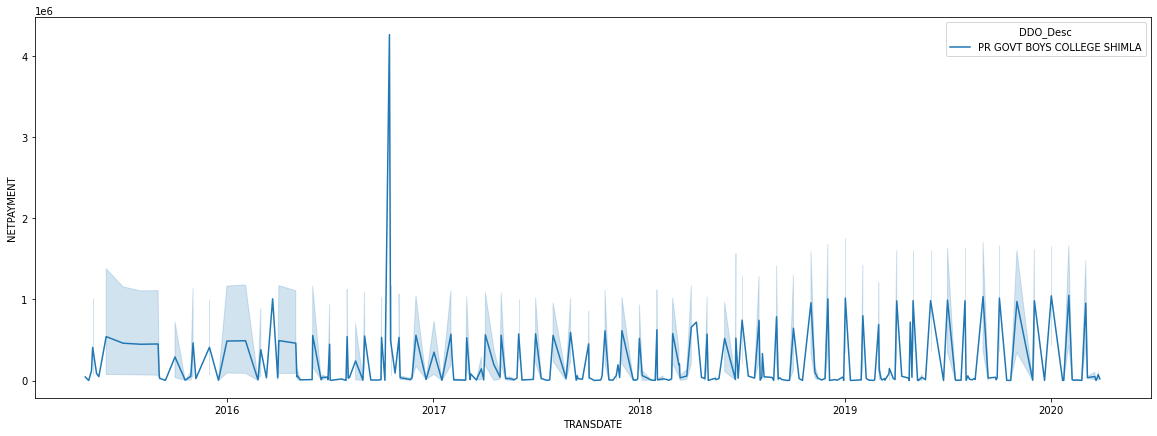

In [ ]:
tres_4=final_ddo_desc[final_ddo_desc["DDO_Desc"].isin(["PR GOVT BOYS COLLEGE SHIMLA"])]
plt.rcParams["figure.figsize"]=(20,7)
sns.lineplot(data=tres_4,x=tres_4.index,y="NETPAYMENT",hue="DDO_Desc")

In [ ]:
tres_4["NETPAYMENT"].sort_values(ascending=False)[:10]

TRANSDATE
2016-10-15    4263320
2015-05-08    2207598
2016-02-03    2180567
2016-01-01    2166232
2016-04-02    2157680
2015-10-01    2156550
2015-06-01    2156433
2015-07-01    2121867
2015-12-01    2119973
2015-11-02    2116986
Name: NETPAYMENT, dtype: int64

In [ ]:
tres_4.loc[tres_4.index.isin(["2016-10-15"])].values

array([[Timestamp('2016-01-01 00:00:00'), 'SHIMLA', 'SML00', 'SHIMLA',
        222, 'PR GOVT BOYS COLLEGE SHIMLA', 8, 'EDUCATION', 2202,
        'GENERAL EDUCATION', 3, 'UNIVERSITY AND HIGHER EDUCATION', 103,
        'GOVERNMENT COLLEGES & INSTITUTES', 1,
        'GOVERNMENT COLLEGES [S00N]', 'S00N', 'V', 'N', 7,
        'RENT  RATES AND TAXES', '[TRVch#383]', 1, 4263320, 0, 0,
        4263320, 'SML00_222']], dtype=object)

In [ ]:
list01

['BEEO NURPUR',
 'BEEO II GHUMARWIN',
 'BEEO KALHEL',
 'PR GOVT BOYS COLLEGE SHIMLA',
 'PRINCIPAL GOVT DEGREE COLLEGE NADAUN',
 'PR GSSS GADSA',
 'PR SSS BARMANA',
 'PR GSSS NIHAL GARH',
 'GSSS HATWAS',
 'PR SSS PHANGWAS']

# 205


In [ ]:
ddo_code=spen.loc[spen["DDO_Code"].isin(["205"])]
print(ddo_code.shape)
ddo_code

(59649, 28)


YEAR  District Treasury_Code  ...  BTDED  NETPAYMENT Unique_Code
TRANSDATE                                      ...                               
2015-05-01 2015-01-01  BILASPUR         BLP00  ...   4588       98518   BLP00_205
2015-05-01 2015-01-01  BILASPUR         BLP00  ...   7042      108343   BLP00_205
2015-05-01 2015-01-01  BILASPUR         BLP00  ...  14125      337543   BLP00_205
2015-05-01 2015-01-01  BILASPUR         BLP00  ...   4553       54370   BLP00_205
2015-05-01 2015-01-01  BILASPUR         BLP00  ...  10120       42640   BLP00_205
...               ...       ...           ...  ...    ...         ...         ...
2020-03-31 2019-01-01       UNA         UNA03  ...  10339           0   UNA03_205
2020-03-31 2019-01-01       UNA         UNA03  ...   6851           0   UNA03_205
2020-03-31 2019-01-01       UNA         UNA03  ...   8483       33313   UNA03_205
2020-03-31 2019-01-01       UNA         UNA03  ...      0        2608   UNA03_205
2020-03-31 2019-01-01       UNA         UNA03  ...      0      104676   UNA03_205

[59649 rows x 28 columns]

In [ ]:
final_ddo_desc=ddo_code.groupby([ddo_code["DDO_Desc"]]).agg({'NETPAYMENT':'sum'})
final_ddo_desc

NETPAYMENT
DDO_Desc                             
BEEO ANNI                   529867189
BEEO INDORA                 450616558
BEEO JAWALI                 250458533
BEEO PANGI                  255303546
BEEO SATAUN                 336754162
...                               ...
PRINCIPAL GSSS CHANDI (A)    24683815
PRINCIPAL GSSS CHIKHAR       17561702
PRINCIPAL GSSS DARINI        22671856
PRINCIPAL GSSS DURGATHI       8986533
PRINCIPAL GSSS SIDHYANI      41841700

[98 rows x 1 columns]

In [ ]:
final_ddo_desc=final_ddo_desc["NETPAYMENT"].sort_values(ascending=False)[:10]
final_ddo_desc

DDO_Desc
BEEO ANNI         529867189
BEEO INDORA       450616558
BEEO SATAUN       336754162
BEEO SUNDLA       303996923
BEEOTISSA         303768280
BEEO PANGI        255303546
BEEO JAWALI       250458533
GSSS  FATEHPUR    119169006
GSSS BATHRI       103250120
GSSS JAMTA        100767146
Name: NETPAYMENT, dtype: int64

In [ ]:
final_ddo_desc.index

Index(['BEEO ANNI', 'BEEO INDORA', 'BEEO SATAUN', 'BEEO SUNDLA', 'BEEOTISSA',
       'BEEO PANGI', 'BEEO JAWALI', 'GSSS  FATEHPUR', 'GSSS BATHRI',
       'GSSS JAMTA'],
      dtype='object', name='DDO_Desc')

In [ ]:
list01=['BEEO ANNI', 'BEEO INDORA', 'BEEO SATAUN', 'BEEO SUNDLA', 'BEEOTISSA',
       'BEEO PANGI', 'BEEO JAWALI', 'GSSS  FATEHPUR', 'GSSS BATHRI',
       'GSSS JAMTA']
final_ddo_desc=ddo_code.loc[ddo_code["DDO_Desc"].isin(list01)]
final_ddo_desc

YEAR District Treasury_Code  ...   BTDED  NETPAYMENT Unique_Code
TRANSDATE                                     ...                                
2015-04-30 2015-01-01   CHAMBA         CHM02  ...       0           0   CHM02_205
2015-04-30 2015-01-01   CHAMBA         CHM02  ...       0           0   CHM02_205
2015-05-08 2015-01-01   CHAMBA         CHM02  ...   40934      377819   CHM02_205
2015-05-08 2015-01-01   CHAMBA         CHM02  ...       0      525100   CHM02_205
2015-05-08 2015-01-01   CHAMBA         CHM02  ...  308521     1012030   CHM02_205
...               ...      ...           ...  ...     ...         ...         ...
2020-03-31 2019-01-01  SIRMAUR         SMR04  ...       0       52000   SMR04_205
2020-03-31 2019-01-01  SIRMAUR         SMR04  ...       0      178000   SMR04_205
2020-03-31 2019-01-01  SIRMAUR         SMR04  ...       0        1401   SMR04_205
2020-03-31 2019-01-01  SIRMAUR         SMR04  ...       0         541   SMR04_205
2020-03-31 2019-01-01  SIRMAUR         SMR04  ...       0     1258000   SMR04_205

[9058 rows x 28 columns]

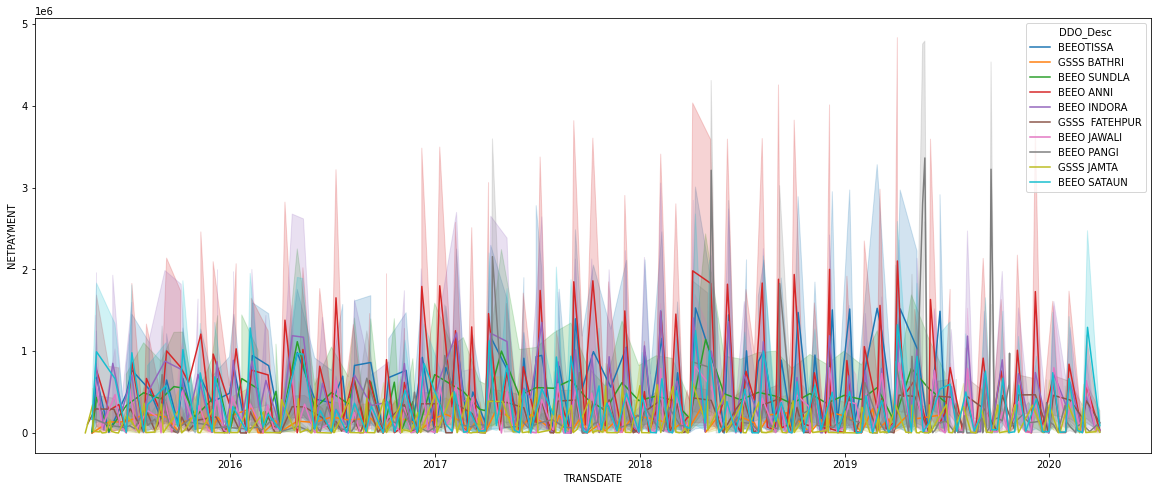

In [ ]:
plt.rcParams['figure.figsize'] = (20,8)
sns.lineplot(data=final_ddo_desc,x=final_ddo_desc.index,y="NETPAYMENT",hue="DDO_Desc")

In [ ]:
list01

['BEEO ANNI',
 'BEEO INDORA',
 'BEEO SATAUN',
 'BEEO SUNDLA',
 'BEEOTISSA',
 'BEEO PANGI',
 'BEEO JAWALI',
 'GSSS  FATEHPUR',
 'GSSS BATHRI',
 'GSSS JAMTA']

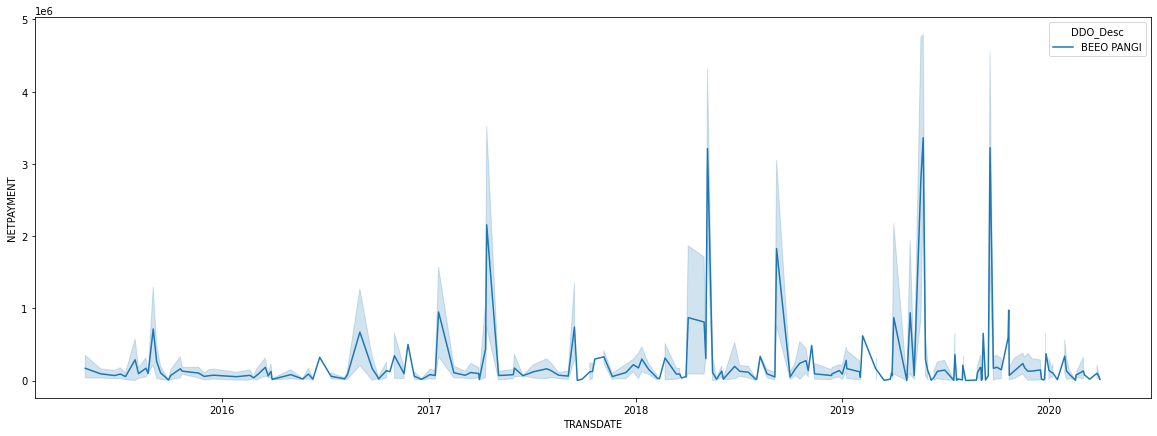

In [ ]:
tres_6=final_ddo_desc[final_ddo_desc["DDO_Desc"].isin(["BEEO PANGI"])]
plt.rcParams["figure.figsize"]=(20,7)
sns.lineplot(data=tres_6,x=tres_6.index,y="NETPAYMENT",hue="DDO_Desc")

In [ ]:
tres_6["NETPAYMENT"].sort_values(ascending=False)[:10]

TRANSDATE
2017-04-13    4860000
2019-09-19    4815000
2019-05-24    4790000
2019-09-19    4770000
2019-05-20    4755000
2018-05-08    4550000
2018-05-08    4550000
2017-04-13    4374000
2018-09-07    4315000
2018-09-07    4280000
Name: NETPAYMENT, dtype: int64

In [ ]:
tres_6.loc[tres_6.index.isin(["2019-09-19"])].values

array([[Timestamp('2019-01-01 00:00:00'), 'CHAMBA', 'PNG00',
        'PANGI(KILLAR)', 205, 'BEEO PANGI', 31, 'TRIBAL DEVELOPMENT',
        2202, 'GENERAL EDUCATION', 1, 'ELEMENTARY EDUCATION', 796,
        'TRIBAL AREA SUB PLAN', 3,
        'EXPENDITURE ON PRIMARY SCHOOLS [S00NM]', 'S00NM', 'V', 'N', 1,
        'SALARIES', '[TRVch#147]', 1, 3030000, 0, 0, 3030000,
        'PNG00_205'],
       [Timestamp('2019-01-01 00:00:00'), 'CHAMBA', 'PNG00',
        'PANGI(KILLAR)', 205, 'BEEO PANGI', 31, 'TRIBAL DEVELOPMENT',
        2202, 'GENERAL EDUCATION', 1, 'ELEMENTARY EDUCATION', 796,
        'TRIBAL AREA SUB PLAN', 3,
        'EXPENDITURE ON PRIMARY SCHOOLS [S00NM]', 'S00NM', 'V', 'N', 1,
        'SALARIES', '[TRVch#148]', 1, 4770000, 0, 0, 4770000,
        'PNG00_205'],
       [Timestamp('2019-01-01 00:00:00'), 'CHAMBA', 'PNG00',
        'PANGI(KILLAR)', 205, 'BEEO PANGI', 31, 'TRIBAL DEVELOPMENT',
        2202, 'GENERAL EDUCATION', 1, 'ELEMENTARY EDUCATION', 796,
        'TRIBAL AREA SUB

In [ ]:
list01

['BEEO ANNI',
 'BEEO INDORA',
 'BEEO SATAUN',
 'BEEO SUNDLA',
 'BEEOTISSA',
 'BEEO PANGI',
 'BEEO JAWALI',
 'GSSS  FATEHPUR',
 'GSSS BATHRI',
 'GSSS JAMTA']

## 214


In [ ]:
ddo_code=spen.loc[spen["DDO_Code"].isin(["214"])]
print(ddo_code.shape)
ddo_code

(39111, 28)


YEAR  District Treasury_Code  ...  BTDED  NETPAYMENT Unique_Code
TRANSDATE                                      ...                               
2015-05-01 2015-01-01  BILASPUR         BLP00  ...   9150      137951   BLP00_214
2015-05-01 2015-01-01  BILASPUR         BLP00  ...   4605       95095   BLP00_214
2015-05-01 2015-01-01  BILASPUR         BLP00  ...   3990       71357   BLP00_214
2015-05-01 2015-01-01  BILASPUR         BLP00  ...   3120       47741   BLP00_214
2015-05-01 2015-01-01  BILASPUR         BLP00  ...  45003      594695   BLP00_214
...               ...       ...           ...  ...    ...         ...         ...
2020-03-20 2019-01-01       UNA         UNA03  ...      0       46180   UNA03_214
2020-03-31 2019-01-01       UNA         UNA03  ...      0        2400   UNA03_214
2020-03-31 2019-01-01       UNA         UNA03  ...   5162           0   UNA03_214
2020-03-31 2019-01-01       UNA         UNA03  ...   7747       52704   UNA03_214
2020-03-31 2019-01-01       UNA         UNA03  ...      0         999   UNA03_214

[39111 rows x 28 columns]

In [ ]:
final_ddo_desc=ddo_code.groupby([ddo_code["DDO_Desc"]]).agg({'NETPAYMENT':'sum'})
final_ddo_desc

NETPAYMENT
DDO_Desc                           
BEEO BIJHARI              523514181
BEEO CHADHAIR             120885656
BEEO JAI DEVI             333889092
BEEO KAFFOTTA             220829106
BEEO PATTA MEHLOG          77340895
...                             ...
PRINCIPAL GSSS RIALI       16573693
PRINCIPAL GSSS SHAHPUR     45288128
PRINCIPAL GSSS SHANGHAR    23246467
PRINCIPAL GSSS SWANA       23341282
PRINCIPAL GSSS TWAR        19498018

[73 rows x 1 columns]

In [ ]:
final_ddo_desc=final_ddo_desc["NETPAYMENT"].sort_values(ascending=False)[:10]
final_ddo_desc

DDO_Desc
BEEO BIJHARI                     523514181
BEEO RAMPUR                      416143641
BEEO JAI DEVI                    333889092
BEEO KAFFOTTA                    220829106
BEEO CHADHAIR                    120885656
GSSS KANDROUR                     94774582
GSSS MATLAHAD                     88196797
GSSS DEOTHI                       84248745
PR GOVT COLLEGE S.NAGAR SAWRA     81758885
GSSS MORSINGHI                    79115015
Name: NETPAYMENT, dtype: int64

In [ ]:
final_ddo_desc.index

Index(['BEEO BIJHARI', 'BEEO RAMPUR', 'BEEO JAI DEVI', 'BEEO KAFFOTTA',
       'BEEO CHADHAIR', 'GSSS KANDROUR', 'GSSS MATLAHAD', 'GSSS DEOTHI',
       'PR GOVT COLLEGE S.NAGAR SAWRA', 'GSSS MORSINGHI'],
      dtype='object', name='DDO_Desc')

In [ ]:
list01=['BEEO BIJHARI', 'BEEO RAMPUR', 'BEEO JAI DEVI', 'BEEO KAFFOTTA',
       'BEEO CHADHAIR', 'GSSS KANDROUR', 'GSSS MATLAHAD', 'GSSS DEOTHI',
       'PR GOVT COLLEGE S.NAGAR SAWRA', 'GSSS MORSINGHI']
final_ddo_desc=ddo_code.loc[ddo_code["DDO_Desc"].isin(list01)]
final_ddo_desc

YEAR  District Treasury_Code  ...  BTDED  NETPAYMENT Unique_Code
TRANSDATE                                      ...                               
2015-05-01 2015-01-01  BILASPUR         BLP00  ...   9150      137951   BLP00_214
2015-05-01 2015-01-01  BILASPUR         BLP00  ...   4605       95095   BLP00_214
2015-05-01 2015-01-01  BILASPUR         BLP00  ...   3990       71357   BLP00_214
2015-05-01 2015-01-01  BILASPUR         BLP00  ...   3120       47741   BLP00_214
2015-05-01 2015-01-01  BILASPUR         BLP00  ...  45003      594695   BLP00_214
...               ...       ...           ...  ...    ...         ...         ...
2020-03-24 2019-01-01     SOLAN         SOL00  ...   1424       12784   SOL00_214
2020-03-30 2019-01-01     SOLAN         SOL00  ...      0        9710   SOL00_214
2020-03-30 2019-01-01     SOLAN         SOL00  ...  11809      119733   SOL00_214
2020-03-31 2019-01-01     SOLAN         SOL00  ...      0       10950   SOL00_214
2020-03-31 2019-01-01     SOLAN         SOL00  ...      0       35380   SOL00_214

[8900 rows x 28 columns]

# 211

In [ ]:
ddo_code=spen.loc[spen["DDO_Code"].isin(["211"])]
print(ddo_code.shape)
ddo_code

(45814, 28)


YEAR  District Treasury_Code  ... BTDED  NETPAYMENT Unique_Code
TRANSDATE                                      ...                              
2015-04-27 2015-01-01  BILASPUR         BLP00  ...     0        6431   BLP00_211
2015-05-01 2015-01-01  BILASPUR         BLP00  ...  8105      145764   BLP00_211
2015-05-01 2015-01-01  BILASPUR         BLP00  ...  6650       90566   BLP00_211
2015-05-01 2015-01-01  BILASPUR         BLP00  ...  6985       86783   BLP00_211
2015-05-01 2015-01-01  BILASPUR         BLP00  ...  5320       45505   BLP00_211
...               ...       ...           ...  ...   ...         ...         ...
2020-03-31 2019-01-01       UNA         UNA03  ...  4267           0   UNA03_211
2020-03-31 2019-01-01       UNA         UNA03  ...  8814       38441   UNA03_211
2020-03-31 2019-01-01       UNA         UNA03  ...     0        7750   UNA03_211
2020-03-31 2019-01-01       UNA         UNA03  ...     0       34319   UNA03_211
2020-03-31 2019-01-01       UNA         UNA03  ...     0       35380   UNA03_211

[45814 rows x 28 columns]

In [ ]:
final_ddo_desc=ddo_code.groupby([ddo_code["DDO_Desc"]]).agg({'NETPAYMENT':'sum'})
final_ddo_desc

NETPAYMENT
DDO_Desc                             
BEEO DHARAMSALA             457300483
BEEO RAJGARH                502041813
GHS GAHAN                     7986792
GHS GHAINI                   35867125
GHS JHARET                   15802635
...                               ...
PRINCIPAL GSSS JHIKNIPUL     11582468
PRINCIPAL GSSS KHARATH       23410319
PRINCIPAL GSSS KUHNA         19278029
PRINCIPAL GSSS NARAINGARH    11170272
PRINCIPAL GSSS REHLU         16249153

[84 rows x 1 columns]

In [ ]:
final_ddo_desc=final_ddo_desc["NETPAYMENT"].sort_values(ascending=False)[:10]
final_ddo_desc

DDO_Desc
BEEO RAJGARH                  502041813
BEEO DHARAMSALA               457300483
GSSS GIRLS BILASPUR           102711966
GSSS BIJHARI                   99550128
GSSS (GIRLS) JOGINDERNAGAR     97811842
GSSS  TOTOO                    97486972
PR SSS BAJAURA                 90654607
PR GSSS SHIVPUR                84299191
GSSS SAROG                     82991064
GSSS OACHGHAT                  78901361
Name: NETPAYMENT, dtype: int64

In [ ]:
final_ddo_desc.index

Index(['BEEO RAJGARH', 'BEEO DHARAMSALA', 'GSSS GIRLS BILASPUR',
       'GSSS BIJHARI', 'GSSS (GIRLS) JOGINDERNAGAR', 'GSSS  TOTOO',
       'PR SSS BAJAURA', 'PR GSSS SHIVPUR', 'GSSS SAROG', 'GSSS OACHGHAT'],
      dtype='object', name='DDO_Desc')

In [ ]:
list01=['BEEO RAJGARH', 'BEEO DHARAMSALA', 'GSSS GIRLS BILASPUR',
       'GSSS BIJHARI', 'GSSS (GIRLS) JOGINDERNAGAR', 'GSSS  TOTOO',
       'PR SSS BAJAURA', 'PR GSSS SHIVPUR', 'GSSS SAROG', 'GSSS OACHGHAT']
final_ddo_desc=ddo_code.loc[ddo_code["DDO_Desc"].isin(list01)]
final_ddo_desc


YEAR  District Treasury_Code  ...  BTDED  NETPAYMENT Unique_Code
TRANSDATE                                      ...                               
2015-04-27 2015-01-01  BILASPUR         BLP00  ...      0        6431   BLP00_211
2015-05-01 2015-01-01  BILASPUR         BLP00  ...   8105      145764   BLP00_211
2015-05-01 2015-01-01  BILASPUR         BLP00  ...   6650       90566   BLP00_211
2015-05-01 2015-01-01  BILASPUR         BLP00  ...   6985       86783   BLP00_211
2015-05-01 2015-01-01  BILASPUR         BLP00  ...   5320       45505   BLP00_211
...               ...       ...           ...  ...    ...         ...         ...
2020-03-20 2019-01-01     SOLAN         SOL00  ...   2341       20984   SOL00_211
2020-03-20 2019-01-01     SOLAN         SOL00  ...   1100           0   SOL00_211
2020-03-21 2019-01-01     SOLAN         SOL00  ...      0        1832   SOL00_211
2020-03-21 2019-01-01     SOLAN         SOL00  ...      0        1714   SOL00_211
2020-03-24 2019-01-01     SOLAN         SOL00  ...  11339       92971   SOL00_211

[9277 rows x 28 columns]

In [ ]:
list01

['BEEO RAJGARH',
 'BEEO DHARAMSALA',
 'GSSS GIRLS BILASPUR',
 'GSSS BIJHARI',
 'GSSS (GIRLS) JOGINDERNAGAR',
 'GSSS  TOTOO',
 'PR SSS BAJAURA',
 'PR GSSS SHIVPUR',
 'GSSS SAROG',
 'GSSS OACHGHAT']

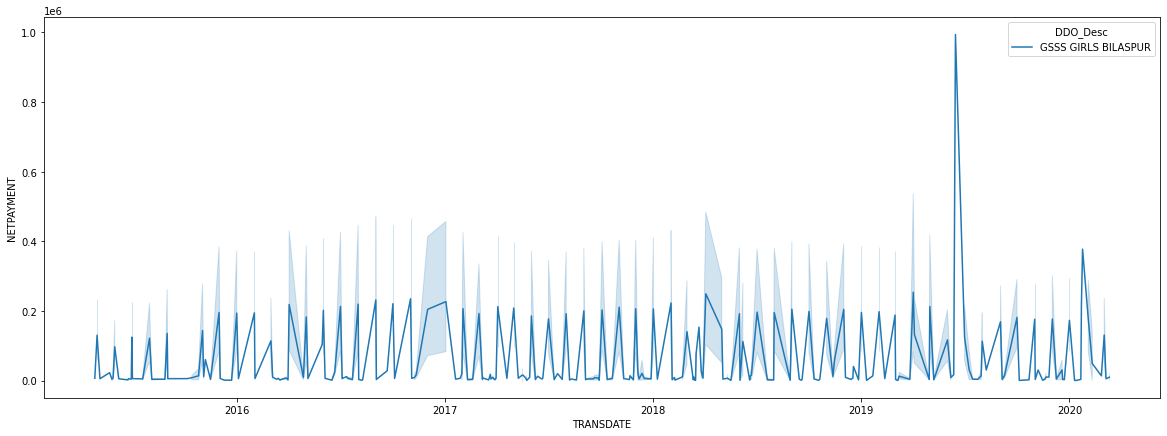

In [ ]:
tres_1=ddo_code[ddo_code["DDO_Desc"].isin(["GSSS GIRLS BILASPUR"])]
plt.rcParams["figure.figsize"]=(20,7)
sns.lineplot(data=tres_1,x=tres_1.index,y="NETPAYMENT",hue="DDO_Desc")

In [ ]:
tres_1["NETPAYMENT"].sort_values(ascending=False)[:10]

TRANSDATE
2018-04-03    1142536
2019-04-02    1073315
2018-09-01    1053922
2019-05-01    1034373
2018-10-01    1017735
2018-02-01    1013020
2018-07-02    1007593
2018-12-01    1002491
2019-06-15     993491
2018-08-01     988808
Name: NETPAYMENT, dtype: int64

In [ ]:
tres_1.loc[tres_1.index.isin(["2019-04-02"])].values

array([[Timestamp('2019-01-01 00:00:00'), 'BILASPUR', 'BLP00',
        'BILASPUR', 211, 'GSSS GIRLS BILASPUR', 8, 'EDUCATION', 2202,
        'GENERAL EDUCATION', 1, 'ELEMENTARY EDUCATION', 101,
        'GOVERNMENT PRIMARY SCHOOLS', 3, 'MIDDLE SCHOOL [S00B]', 'S00N',
        'V', 'N', 1, 'SALARIES', '[TRVch#50]', 1, 204336, 25000, 9179,
        170157, 'BLP00_211'],
       [Timestamp('2019-01-01 00:00:00'), 'BILASPUR', 'BLP00',
        'BILASPUR', 211, 'GSSS GIRLS BILASPUR', 8, 'EDUCATION', 2202,
        'GENERAL EDUCATION', 1, 'ELEMENTARY EDUCATION', 101,
        'GOVERNMENT PRIMARY SCHOOLS', 3, 'MIDDLE SCHOOL [S00B]', 'S00N',
        'V', 'N', 1, 'SALARIES', '[TRVch#51]', 1, 308952, 106000, 4091,
        198861, 'BLP00_211'],
       [Timestamp('2019-01-01 00:00:00'), 'BILASPUR', 'BLP00',
        'BILASPUR', 211, 'GSSS GIRLS BILASPUR', 8, 'EDUCATION', 2202,
        'GENERAL EDUCATION', 1, 'ELEMENTARY EDUCATION', 101,
        'GOVERNMENT PRIMARY SCHOOLS', 3, 'MIDDLE SCHOOL [S00B]', 'S00

#230

In [ ]:
ddo_code=spen.loc[spen["DDO_Code"].isin(["230"])]
print(ddo_code.shape)

(12908, 28)


In [ ]:
final_ddo_desc=ddo_code.groupby([ddo_code["DDO_Desc"]]).agg({'NETPAYMENT':'sum'})
final_ddo_desc

NETPAYMENT
DDO_Desc                                            
BEEO JOL                                    28322054
GHS BAFFRIN                                 17013338
GHS BALIAH                                  15893569
GHS CHALOLA                                 38734764
GHS JHIKLI BHELH                            20041916
GSSS BADDU DADHOG                           25523638
GSSS GHALIAN                                45028295
GSSS KASBA NARWANA                          31901634
GSSS KATHALAG                               45703123
GSSS SAHO                                   66337522
GSSS SUMMER HILL SHIMLA                     85235968
GSSS TIYALI                                 27130441
HM GHS LALSA                                16465264
HM GHS NERTI                                 7975482
PR GSSS BAREOGGI                            22839610
PR GSSS NANGALKHURD                         31132522
PR GSSS SHALLANG                            73276872
PR GSSS TOKNAGALA                           31957567
PR SSS RAJWARI                              28737719
PR SSS SADHOT                               48701850
PRI.GSSS JACHH                              28490623
PRINCIPAL GOVT. DEGREE COLLEGE SHIVNAGAR    25323779
PRINCIPAL GSSS CHANAL MAJRA                 23723493
PRINCIPAL GSSS DINGER KINNER                 6431193
PRINCIPAL GSSS DUDHAM MATIYANA               4946482
PRINCIPAL GSSS JADLA                        27028963
PRINCIPAL GSSS KOTHON                       27062246
PRINCIPAL GSSS MANJYAT                      27434710
PRINCIPAL GSSS MATTAR                       18114284
PRINCIPAL GSSS RANGAS                       30869327

In [ ]:
final_ddo_desc=final_ddo_desc["NETPAYMENT"].sort_values(ascending=False)[:10]
final_ddo_desc

DDO_Desc
GSSS SUMMER HILL SHIMLA    85235968
PR GSSS SHALLANG           73276872
GSSS SAHO                  66337522
PR SSS SADHOT              48701850
GSSS KATHALAG              45703123
GSSS GHALIAN               45028295
GHS CHALOLA                38734764
PR GSSS TOKNAGALA          31957567
GSSS KASBA NARWANA         31901634
PR GSSS NANGALKHURD        31132522
Name: NETPAYMENT, dtype: int64

In [ ]:
final_ddo_desc.index

Index(['GSSS SUMMER HILL SHIMLA', 'PR GSSS SHALLANG', 'GSSS SAHO',
       'PR SSS SADHOT', 'GSSS KATHALAG', 'GSSS GHALIAN', 'GHS CHALOLA',
       'PR GSSS TOKNAGALA', 'GSSS KASBA NARWANA', 'PR GSSS NANGALKHURD'],
      dtype='object', name='DDO_Desc')

In [ ]:
list01=['GSSS SUMMER HILL SHIMLA', 'PR GSSS SHALLANG', 'GSSS SAHO',
       'PR SSS SADHOT', 'GSSS KATHALAG', 'GSSS GHALIAN', 'GHS CHALOLA',
       'PR GSSS TOKNAGALA', 'GSSS KASBA NARWANA', 'PR GSSS NANGALKHURD']

final_ddo_desc=ddo_code.loc[ddo_code["DDO_Desc"].isin(list01)]

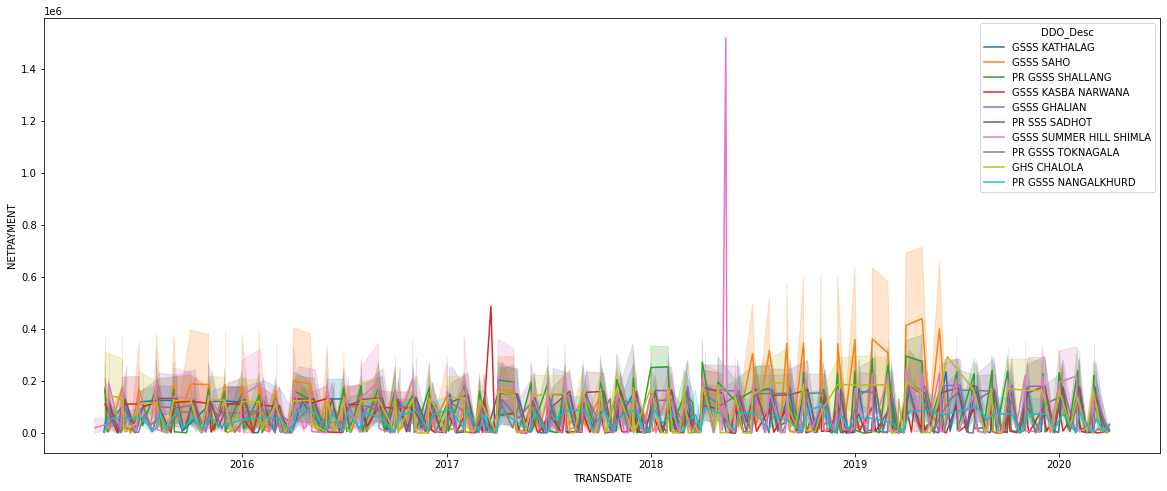

In [ ]:
plt.rcParams['figure.figsize'] = (20,8)
sns.lineplot(data=final_ddo_desc,x=final_ddo_desc.index,y="NETPAYMENT",hue="DDO_Desc")

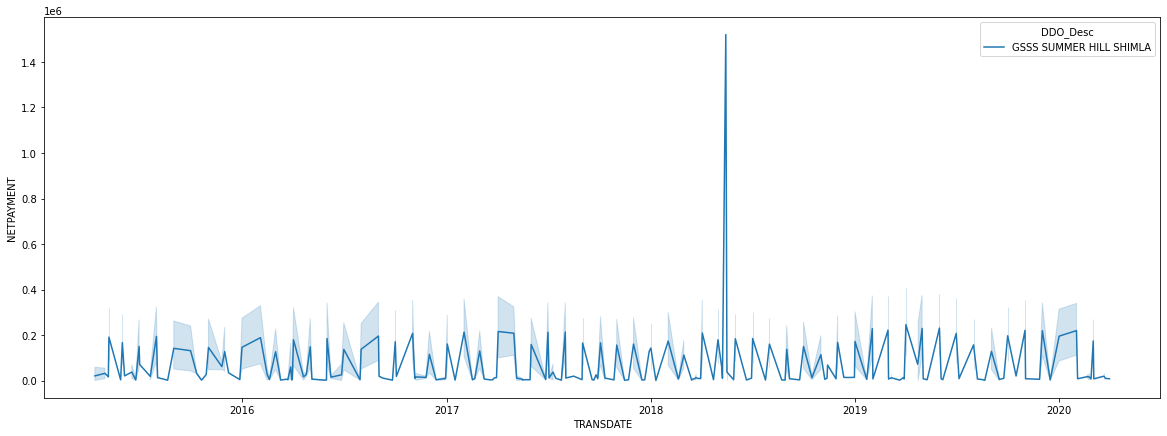

In [ ]:
tres_10=final_ddo_desc[final_ddo_desc["DDO_Desc"].isin(["GSSS SUMMER HILL SHIMLA"])]
plt.rcParams["figure.figsize"]=(20,7)
sns.lineplot(data=tres_10,x=tres_10.index,y="NETPAYMENT",hue="DDO_Desc")

In [ ]:
tres_10["NETPAYMENT"].sort_values(ascending=False)[:10]

TRANSDATE
2018-05-15    1520535
2019-04-02     668754
2019-08-01     652091
2019-07-01     646268
2019-06-01     609268
2019-02-01     605481
2019-09-02     595066
2019-03-01     577635
2019-11-01     574944
2019-10-01     570290
Name: NETPAYMENT, dtype: int64

In [ ]:
tres_10.loc[tres_10.index.isin(["2018-05-15"])].values

array([[Timestamp('2018-01-01 00:00:00'), 'SHIMLA', 'SML00', 'SHIMLA',
        230, 'GSSS SUMMER HILL SHIMLA', 8, 'EDUCATION', 2202,
        'GENERAL EDUCATION', 2, 'SECONDARY EDUCATION', 109,
        'GOVERNMENT SECONDARY SCHOOLS', 1, 'SECONDARY SCHOOLS [S00B]',
        'S00N', 'V', 'N', 1, 'SALARIES', '[TRVch#1994]', 1, 2210070, 0,
        689535, 1520535, 'SML00_230']], dtype=object)

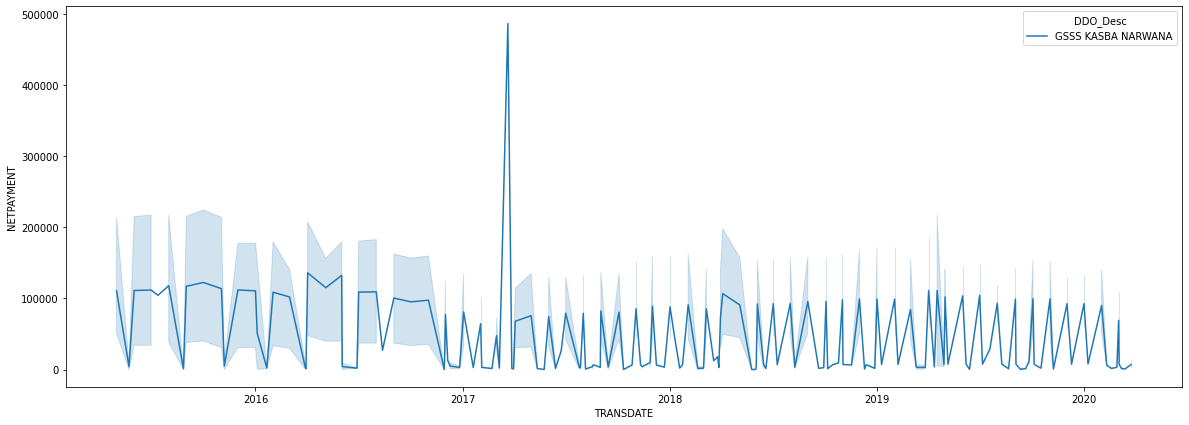

In [ ]:

tres_10=final_ddo_desc[final_ddo_desc["DDO_Desc"].isin(["GSSS KASBA NARWANA"])]
plt.rcParams["figure.figsize"]=(20,7)
sns.lineplot(data=tres_10,x=tres_10.index,y="NETPAYMENT",hue="DDO_Desc")

In [ ]:
tres_10["NETPAYMENT"].sort_values(ascending=False)[:10]

TRANSDATE
2017-03-21    486897
2018-04-04    322078
2019-04-02    294201
2018-03-31    292232
2019-02-01    265652
2019-01-01    265652
2018-12-01    264932
2018-11-01    260530
2018-02-02    259644
2018-01-01    254584
Name: NETPAYMENT, dtype: int64

In [ ]:
tres_10.loc[tres_10.index.isin(["2017-03-21"])].values

array([[Timestamp('2016-01-01 00:00:00'), 'DHARAMSALA', 'KNG00',
        'DHARAMSALA', 230, 'GSSS KASBA NARWANA', 8, 'EDUCATION', 2202,
        'GENERAL EDUCATION', 2, 'SECONDARY EDUCATION', 109,
        'GOVERNMENT SECONDARY SCHOOLS', 1, 'SECONDARY SCHOOLS [S00B]',
        'S00N', 'V', 'N', 6, 'MEDICAL REIMBURSEMENT', '[TRVch#4114]', 1,
        486897, 0, 0, 486897, 'KNG00_230']], dtype=object)